In [1]:
import numpy as np
from data_prep import get_fractured

In [2]:
# Data extracted from https://github.com/renato145/3D-ORGAN
original = np.load("custom_arq_dataset.npy", allow_pickle=True).item()

In [3]:
mask_train = np.array(original['train']['labels']) == 'table'
mask_test = np.array(original['test']['labels']) == 'table'

In [4]:
model_train = original['train']['data'][mask_train]
model_test = original['test']['data'][mask_test]

In [5]:
train_y = []
train_x = []
for model in model_train:
    frac = get_fractured(model)
    train_x.append(frac)
    train_y.append(model)
train_x = np.array(train_x)
train_y = np.array(train_y)

In [6]:
test_y = []
test_x = []
for model in model_test:
    frac = get_fractured(model)
    test_x.append(frac)
    test_y.append(model)
test_x = np.array(test_x)
test_y = np.array(test_y)

In [7]:
import matplotlib.pyplot as plt
import random

In [8]:
index = random.randint(0, len(train_x)-1)
model = train_x[index]
model_fractured = train_x[index]
model_original = train_y[index]

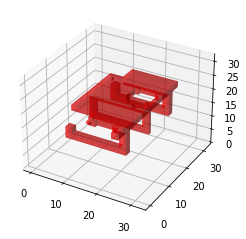

In [12]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(model_fractured, facecolors='red', alpha=0.5)
#ax.voxels(model_original&~model_fractured, facecolors='lime', edgecolors='green')
plt.show()

# Save data

In [13]:
np.save("dataset.npy", {
    "train":{
        "x": train_x,
        "y": train_y
    }
})